
# **ADVANCED OPTIMIZATION TECHNIQUES**

# ASSIGNMENT-1

---



<pre>
                                                                           Submitted by
                                                                                Muhammad Ashiq Ameer
                                                                                M.Tech DS & AI
</pre>



<pre>Aim:     To implement Clonal Selection Algorithm to solve Eight Queen problem</pre>


<pre>
Algorithm:
      1.Initialize generation number as zero
      2.Initialize the first generation population
      3.Fitness evaluation of the current population
      4.while termination criteria not met do
          4.1 Select N individuals from the population pool
          4.2 generate Cloned population from the selected N individuals
          4.3 Maturate cloned population and merge with the population pool
          4.4 Randomly generate fresh individuals
          4.5 Merge and update current population
          4.6 Fitness evaluation of the current population
          4.7 Select individuals from the population pool for the next generation
</pre>

<pre>
Procedure:
      1) create some randomly (decided by "number_of_random_boards") initialised chess boards as a list of lists
      2) calculate the fitness score of each created board. Fitness means how many queens are under attack
      3) we have a list of boards and a list of their fitness score as 2 separate list.we map them together using zip function
      4) Picking up the N best boards based on fitness score ,N=number_of_best_to_choose
      5) Creating clones of the best N picked boards.Number of clones of each best board depend on clone_rate
      6) Mutating the cloned board by randomly selecting positions of m queens in each board,Where m = mutation_rate
      7) Create some new random boards again to maintain population size
      8) Repeat until a fitness score of 0 is found
</pre>

code:

generation :  1
generation :  2
generation :  3
generation :  4
generation :  5
generation :  6
generation :  7
generation :  8
generation :  9
generation :  10
generation :  11
generation :  12
generation :  13
generation :  14
generation :  15
generation :  16
generation :  17
generation :  18
the solution is
[4, 2, 0, 6, 1, 7, 5, 3]
Found at generation 18


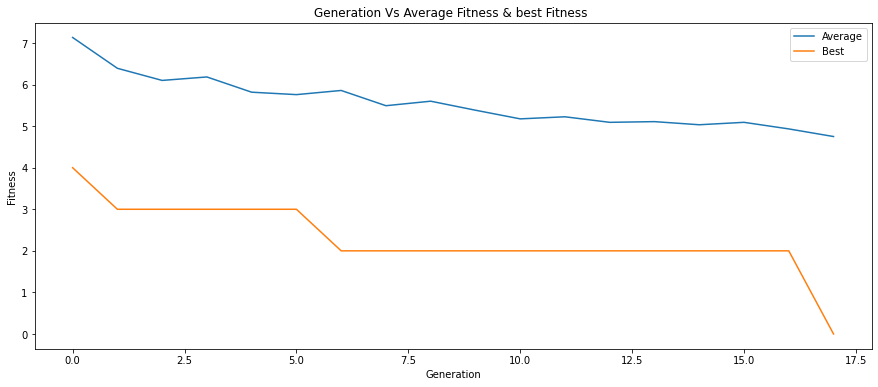

In [5]:
import random
from statistics import mean
import matplotlib.pyplot as plt

number_of_random_boards=100
number_of_best_to_choose=40
clone_rate=2
mutation_rate=2

#  create functions to do specific tasks 
#  create some randomly initialised chess boards

def create_random_boards(number_of_random_boards):
     
        list_of_boards=[]
        for r in range(number_of_random_boards):
            q=[]
            for t in range(8):
                w=random.randint(0,7)
                q.append(w)
                
            list_of_boards.append(q)    
        return list_of_boards    


#  calculate the fitness score of each created board
#  fitness score of 0 (zero queens are under attack) is the best one
        
def canQueenAttack(list_of_boards):

    score_list=[]    
    for a_board in list_of_boards:
        list_of_positions=list(enumerate(a_board ))             
        score=0
        for (qR,qC) in list_of_positions:
            for (oR,oC) in list_of_positions:                
                if (qR,qC)!=(oR,oC):
                    if (qR == oR) | (qC == oC) | (abs(qR - oR) == abs(qC - oC)) : 
                        score=score+1
                        break
        score_list.append(score)
                   
    return score_list 


#  creating a map between each board and its respective fitness score to understand which board have a good score

def join_position_and_score(list_of_boards,fitness_score):

    q=zip(list_of_boards,fitness_score)
    position_with_score=list(q)
    
    return position_with_score


#  picking up the N best boards based on fitness score
    
def finding_best_n_postions(number_of_best_to_choose,position_with_score):

    position_with_score_sorted=position_with_score.copy()
    position_with_score_sorted.sort(key=lambda x: x[1])
  
    best_n=position_with_score_sorted[:number_of_best_to_choose]
    best_n_positions=[]
    for (q,p) in best_n:
           best_n_positions.append(q) 
    
    return best_n_positions 


#creating clones of the best N picked boards

def create_clones(clone_rate,best_n_positions ):
    
    cloned_list_of_position=[]
    for i in best_n_positions:
        cloned_list_of_position += [i[:] for _ in range(clone_rate)]
    
    return cloned_list_of_position


#  Mutating the cloned boards,by simply varying positions of m queens in each board,Where m = mutation_rate

def create_mutation(mutation_rate,cloned_list_of_position):
    
    mutated_cloned_positions=[]            
    for i in cloned_list_of_position:              
        for t in range(mutation_rate):
           while(True): 
                w=random.randint(0,7)         #picking random position
                q=random.randint(0,7)         #picking random number    
                if (i[w] != q) :
                    i[w]=q
                    break
        mutated_cloned_positions.append(i)    
        
    return mutated_cloned_positions


# execution

list_of_boards=create_random_boards(number_of_random_boards)
fitness_score=canQueenAttack(list_of_boards)
generation=0
position_with_score=join_position_and_score(list_of_boards,fitness_score)

#  continue while loop until a fitness score of 0 is found
average_fittness_of_a_population=[]
best=[]
while(0 not in fitness_score):
    
    best_n_positions =finding_best_n_postions(number_of_best_to_choose,position_with_score)
    cloned_list_of_position=create_clones(clone_rate,best_n_positions )
    mutated_cloned_positions=create_mutation(mutation_rate,cloned_list_of_position)

    list_of_subrandom_boards=list_of_boards + mutated_cloned_positions

    fitness_score=canQueenAttack(list_of_subrandom_boards)
    position_with_score=join_position_and_score(list_of_subrandom_boards,fitness_score)
    best_100_positions =finding_best_n_postions(number_of_best_to_choose,position_with_score)
    list_of_boards=best_100_positions.copy()
   

    average_fittness_of_a_population.append(mean(fitness_score))
    best.append(min(fitness_score))

    generation=generation+1
    
    print("generation : ",generation)

# print solution
for (q,p) in position_with_score:
    if p==0:
        print("the solution is")
        
        print(q)
        
        print("Found at generation",generation)

# plot graph

fig, axes = plt.subplots(figsize=(15, 6))
axes.plot([ x for x in range(generation)],average_fittness_of_a_population, label="Average")
axes.plot(best, label="Best")
axes.set_title('Generation Vs Average Fitness & best Fitness ')
axes.set_xlabel('Generation')
axes.set_ylabel('Fitness')
axes.legend()
